In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

In [23]:
from algorithms import KNNClassifier, PCAModel, Ensemble

In [24]:
def read_data(trainfile='MNIST_train.csv', validationfile='MNIST_validation.csv'):
    
    dftrain = pd.read_csv(trainfile)
    dfval = pd.read_csv(validationfile)

    featurecols = list(dftrain.columns)
    featurecols.remove('label')
    featurecols.remove('even')
    targetcol = 'label'

    Xtrain = dftrain[featurecols]
    Xtrain = Xtrain / 255
    ytrain = dftrain[targetcol]
    
    Xval = dfval[featurecols]
    Xval = Xval / 255
    yval = dfval[targetcol]

    return (Xtrain, ytrain, Xval, yval)

In [25]:
Xtrain, ytrain, Xval, yval = read_data('MNIST_train.csv', 'MNIST_validation.csv')

# KNN Model

In [26]:
knn_model = KNNClassifier(n_neighbors=5)
knn_model.fit(Xtrain.values, ytrain.values)

In [27]:
knn_ypred = knn_model.predict(Xval.values)
print(accuracy_score(yval.values, knn_ypred))
score_macro = f1_score(yval.values, knn_ypred, average='macro')
print(score_macro)

0.9515806322529011
0.9515057891230665


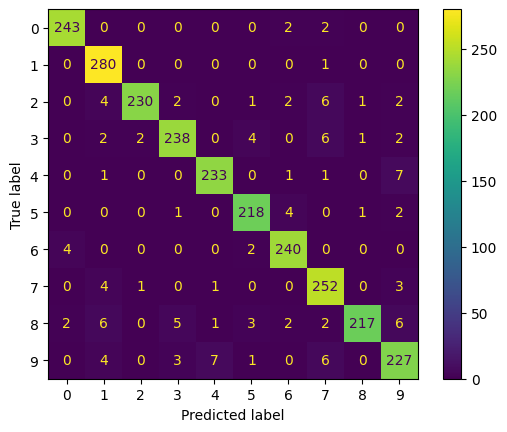

In [28]:
ConfusionMatrixDisplay(confusion_matrix(yval.values, knn_ypred)).plot()
plt.show()

# KNN with PCA 

In [29]:
pca = PCAModel(n_components=20)
pca.fit(Xtrain)
Xtrain_pca = pca.transform(Xtrain)
Xval_pca = pca.transform(Xval)

knn_with_pca = KNNClassifier(n_neighbors=5, metric='euclidean', weights='distance')
knn_with_pca.fit(Xtrain_pca, ytrain)
knn_pca_y_pred = knn_with_pca.predict(Xval_pca)
print(accuracy_score(yval.values, knn_pca_y_pred))
score_macro = f1_score(yval.values, knn_pca_y_pred, average='macro')
print(score_macro)

0.9551820728291317
0.954858300003288


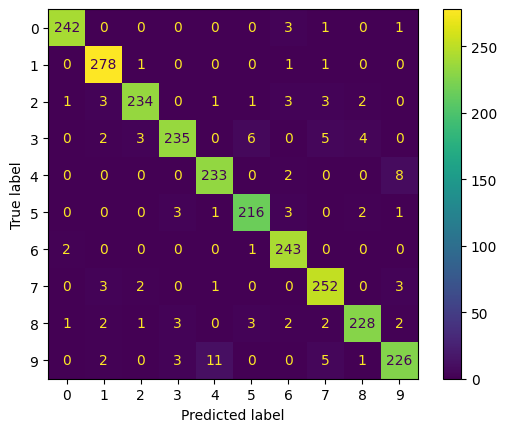

In [30]:
ConfusionMatrixDisplay(confusion_matrix(yval.values, knn_pca_y_pred)).plot()
plt.show()

# With Bagging

In [31]:
bagging_model = Ensemble(knn_cls = KNNClassifier, pca_cls = PCAModel,n_estimators=50,
    ensemble_type='bagging',
    pca_n_components=20,
    **{'n_neighbors': 5, 'metric': 'euclidean', 'weights': 'distance'})

bagging_model.fit(Xtrain, ytrain)
baggknn_y_pred = bagging_model.predict(Xval)
print(accuracy_score(yval.values, baggknn_y_pred))
score_macro = f1_score(yval.values, baggknn_y_pred, average='macro')
print(score_macro)

0.9543817527010804
0.9540357851633484


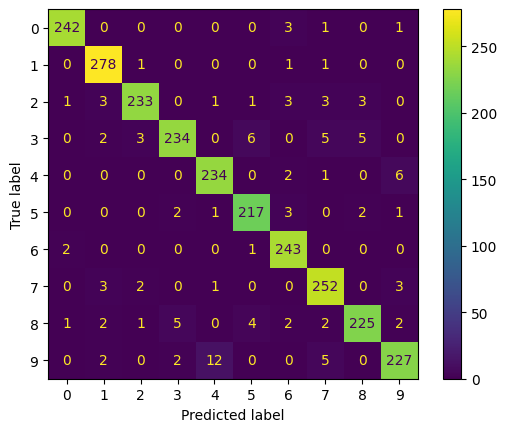

In [32]:
ConfusionMatrixDisplay(confusion_matrix(yval.values, baggknn_y_pred)).plot()
plt.show()

## Tuning the hyperparameters

# Tuning the number of PCA components

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


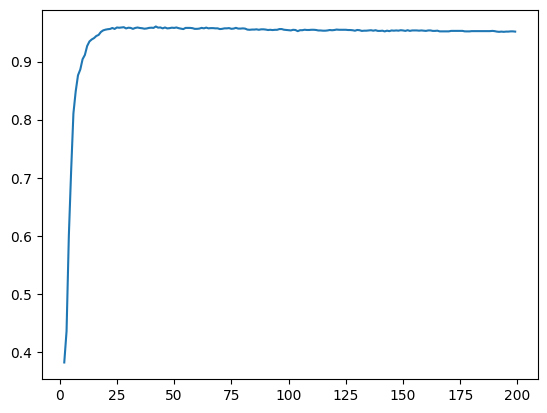

In [ ]:
""" k_list = [i for i in range(2,200)]
f1_scores = []
for k in k_list:
    pca = PCAModel(n_components=k)
    pca.fit(Xtrain)
    Xtrain_pca = pca.transform(Xtrain)
    Xval_pca = pca.transform(Xval)

    knn_with_pca = KNNClassifier(n_neighbors=5, metric='euclidean', weights='distance')
    knn_with_pca.fit(Xtrain_pca, ytrain)
    print(k)
    knn_pca_y_pred = knn_with_pca.predict(Xval_pca)
    f1_scores.append(f1_score(yval.values, knn_pca_y_pred, average='macro'))
    
plt.plot(k_list,f1_scores)
plt.show() """

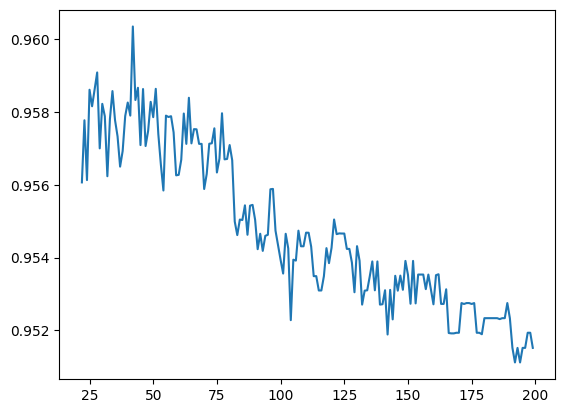

In [ ]:
""" plt.plot(k_list[20:],f1_scores[20:])
plt.show() """

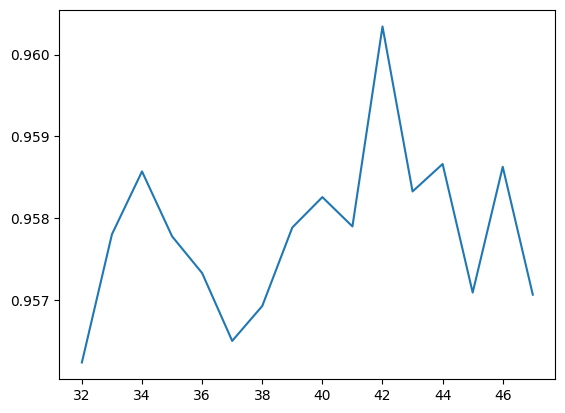

In [ ]:
""" plt.plot(k_list[30:46],f1_scores[30:46])
plt.show() """

So Best number of PCA components to maximise F1_score = 42

# Tuning the K value = Neighbors count

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


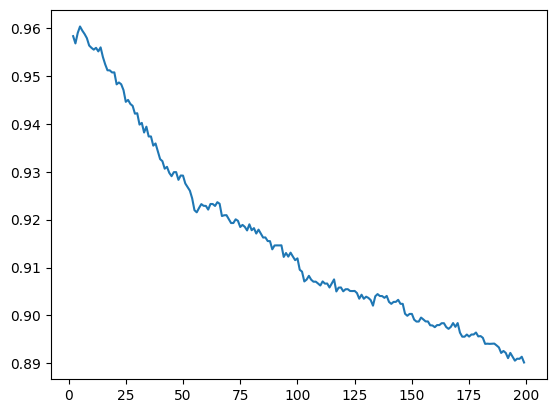

In [ ]:
""" k_list = [i for i in range(2,200)]
f1_scores = []
for k in k_list:
    pca = PCAModel(n_components=42)
    pca.fit(Xtrain)
    Xtrain_pca = pca.transform(Xtrain)
    Xval_pca = pca.transform(Xval)

    knn_with_pca = KNNClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    knn_with_pca.fit(Xtrain_pca, ytrain)
    print(k)
    knn_pca_y_pred = knn_with_pca.predict(Xval_pca)
    f1_scores.append(f1_score(yval.values, knn_pca_y_pred, average='macro'))
    
plt.plot(k_list,f1_scores)
plt.show() """

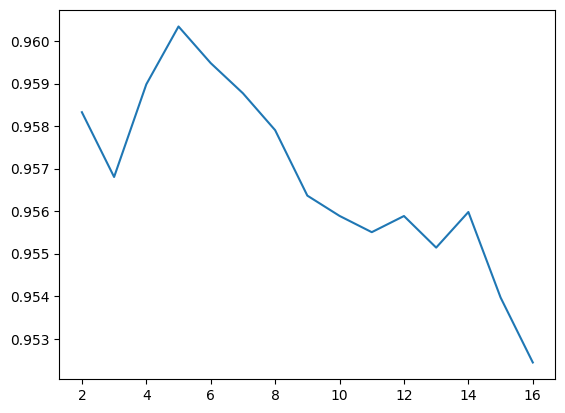

In [ ]:
""" plt.plot(k_list[:15],f1_scores[:15])
plt.show() """

So Best number of neighbours count to maximise F1_score = 5

# Bagging with tuned parameters

In [38]:
bagging_model = Ensemble(knn_cls = KNNClassifier, pca_cls = PCAModel, n_estimators=200,
    ensemble_type='bagging',
    pca_n_components=42,
    **{'n_neighbors': 5, 'metric': 'euclidean', 'weights': 'distance'})

bagging_model.fit(Xtrain, ytrain)
baggknn_y_pred = bagging_model.predict(Xval)
print(accuracy_score(yval.values, baggknn_y_pred))
score_macro = f1_score(yval.values, baggknn_y_pred, average='macro')
print(score_macro)

0.9587835134053622
0.9587751584178245


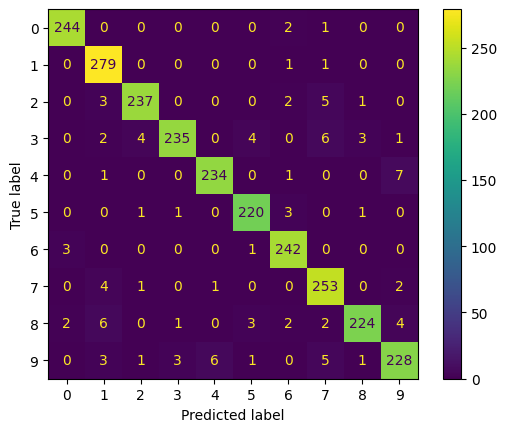

In [39]:
ConfusionMatrixDisplay(confusion_matrix(yval.values, baggknn_y_pred)).plot()
plt.show()

# Normal KNN with tuned parameters

In [40]:
pca = PCAModel(n_components=42)
pca.fit(Xtrain)
Xtrain_pca = pca.transform(Xtrain)
Xval_pca = pca.transform(Xval)

knn_with_pca = KNNClassifier(n_neighbors=5, metric='euclidean', weights='distance')
knn_with_pca.fit(Xtrain_pca, ytrain)
knn_pca_y_pred = knn_with_pca.predict(Xval_pca)
print(accuracy_score(yval.values, knn_pca_y_pred))
score_macro = f1_score(yval.values, knn_pca_y_pred, average='macro')
print(score_macro)

0.9603841536614646
0.9603441947922515


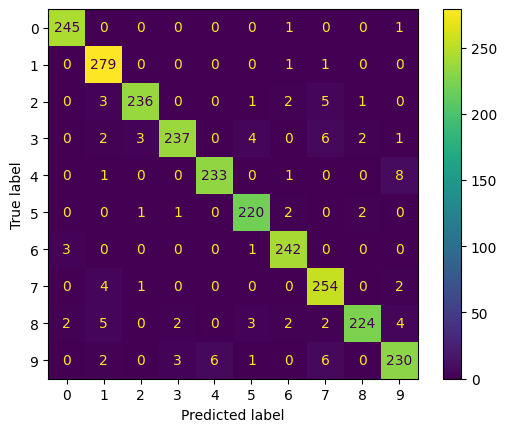

In [41]:
ConfusionMatrixDisplay(confusion_matrix(yval.values, knn_pca_y_pred)).plot()
plt.show()